In [ ]:
# code1 using VGG16 and KNN

In [41]:
import numpy as np
import pandas as pd

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16


In [43]:
# pretrained model
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(32,32,3)
)
# transfer learning

In [44]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [45]:
train_df = pd.read_csv('/train.csv')

In [46]:
train_df

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0,1.157565,-0.142219,1.043992,1.144946,1.195423,0.248978,-1.505100,-0.874137,-1.782724,...,1.195423,-0.255793,-0.154838,0.413029,-0.482939,-1.277953,-0.445082,1.195423,-0.924614,-0.432462
5246,0,1.424709,0.235910,1.356778,1.368099,-0.318862,1.039765,-0.986854,-0.330184,-1.383120,...,1.424709,-1.066107,0.881258,-0.488691,-1.281223,-1.213291,0.122692,1.175627,-1.145360,0.451026
5247,1,-0.375687,1.524455,0.012514,-0.007917,0.073809,-0.906909,-1.254247,1.606182,0.298557,...,-0.028349,-0.968204,-1.233815,1.626613,-0.191802,1.115823,0.380284,-0.293960,0.135104,1.381434
5248,1,-0.478238,1.666142,0.049609,-0.428752,-0.362771,1.798104,-0.214314,0.775400,-0.379267,...,-0.428752,-1.121552,-0.379267,-0.593705,0.049609,1.765114,0.313533,-0.329781,-1.220524,0.033114


In [47]:
# features extraction
features = []
for i in range(len(train_df)):
  feat = np.array(train_df.drop('labels',axis=1).iloc[i])
  feat = feat.reshape(20,20,3)
  padded = np.zeros((32,32,3))
  padded[6:26,6:26,:] = feat
  feat = padded.reshape(1,32,32,3)
  feat = conv_base(feat)
  feat = np.array(feat[0]).reshape(512)
  features.append(feat)

In [48]:
df_feat = pd.DataFrame(features)

In [49]:
df_new = pd.concat([train_df,df_feat],axis=1)

In [50]:
df_new.columns = df_new.columns.astype(str)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [52]:
# knn = KNeighborsClassifier(n_neighbors= 7, p= 1, weights= 'uniform')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('labels',axis=1), df_new['labels'], test_size=0.05, random_state=42)

In [54]:
# HYPERparameter tuning of KNN
from sklearn.model_selection import GridSearchCV

In [55]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [56]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [57]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [58]:
# find the best score
g_res.best_score_

0.8792872598899288

In [59]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [60]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [61]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [69]:
pip install --upgrade tensorflow keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8745247148288974

In [65]:
test_df = pd.read_csv('/test.csv')

In [72]:
features_t = []
for i in range(len(test_df)):
  feat = np.array(test_df.drop('id',axis=1).iloc[i])
  feat = feat.reshape(20,20,3)
  padded = np.zeros((32,32,3))
  padded[6:26,6:26,:] = feat
  feat = padded.reshape(1,32,32,3)
  feat = conv_base(feat)
  feat = np.array(feat[0]).reshape(512)
  features_t.append(feat)

In [74]:
test_feat = pd.DataFrame(features_t)

In [75]:
df_t_new = pd.concat([test_df.drop('id',axis=1),test_feat],axis=1)
df_t_new.columns = df_t_new.columns.astype(str)

In [76]:
pred =knn.predict(df_t_new)

In [77]:
sub = pd.DataFrame()
sub['id'] = test_df['id']
sub['labels']=pred

In [81]:
sub.to_csv('solution2.csv',index=False)

In [ ]:
# second try using ANN

In [90]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [91]:
pip install --upgrade tensorflow keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import BatchNormalization

In [93]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(32,32,3)
)

In [94]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [95]:
conv_base.trainable = False

In [63]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [88]:
features_test = []
for i in range(len(test_df)):
 feat = np.array(test_df.drop('id',axis=1).iloc[i])
 feat= feat.reshape(20,20,3)
 padded= np.zeros((32,32,3))
 padded[6:26,6:26,:] = feat
 features_test.append(padded)

In [65]:
features = []
for i in range(len(train_df)):
  feat = np.array(train_df.drop('labels',axis=1).iloc[i])
  feat = feat.reshape(20,20,3)
  padded = np.zeros((32,32,3))
  padded[6:26,6:26,:] = feat
  features.append(padded)

In [66]:
labels = list(train_df['labels'][:len(train_df)])
len(features)

5250

In [84]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [85]:
history = model.fit(np.array(features),np.array(labels),batch_size=32,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
132/132 [==============================] - 5s 15ms/step - loss: 0.6928 - accuracy: 0.6117 - val_loss: 0.5747 - val_accuracy: 0.7324
Epoch 2/50
132/132 [==============================] - 2s 12ms/step - loss: 0.6154 - accuracy: 0.6986 - val_loss: 0.5210 - val_accuracy: 0.7400
Epoch 3/50
132/132 [==============================] - 2s 12ms/step - loss: 0.5803 - accuracy: 0.7176 - val_loss: 0.4663 - val_accuracy: 0.7467
Epoch 4/50
132/132 [==============================] - 2s 15ms/step - loss: 0.5698 - accuracy: 0.7248 - val_loss: 0.4967 - val_accuracy: 0.7314
Epoch 5/50
132/132 [==============================] - 2s 14ms/step - loss: 0.5657 - accuracy: 0.7226 - val_loss: 0.5069 - val_accuracy: 0.7438
Epoch 6/50
132/132 [==============================] - 2s 12ms/step - loss: 0.5625 - accuracy: 0.7262 - val_loss: 0.4406 - val_accuracy: 0.7857
Epoch 7/50
132/132 [==============================] - 2s 12ms/step - loss: 0.5609 - accuracy: 0.7293 - val_loss: 0.5248 - val_accuracy: 0.7362

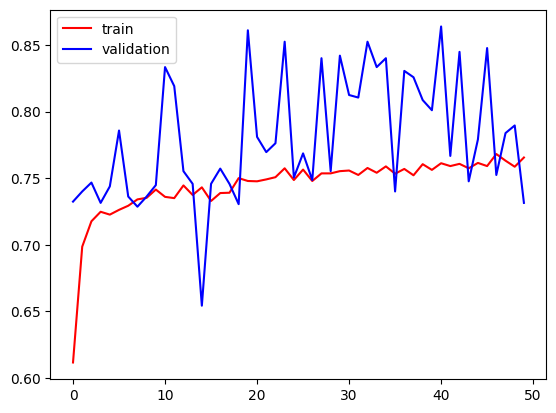

In [86]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

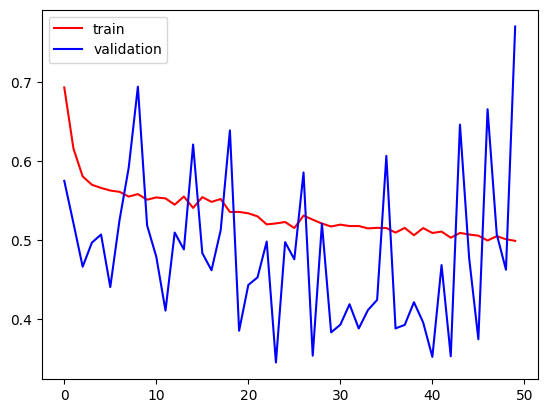

In [87]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [96]:
pred=model.predict(np.array(features_test))

71/71 [==============================] - 1s 11ms/step


In [97]:
sub = pd.DataFrame()
sub['id'] = test_df['id']
sub['labels']=pred

In [99]:
sub.to_csv('solution1.csv',index=False)